In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),
                         (0.5,0.5,0.5))
])


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [4]:
trainset = torchvision.datasets.CIFAR10(
    root='../data',
    train=True,
    download=False,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='../data',
    train=False,
    download=False,
    transform=transform
)


In [5]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=32,
    shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=32,
    shuffle=False
)


In [6]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)
    def forward(self,x):
        x=x.view(x.size(0),-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [7]:
model = MLP().to(device)
print(model)


MLP(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [9]:
epochs = 10
loss_history = []
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    loss_history.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


Epoch [1/10], Loss: 1.6564
Epoch [2/10], Loss: 1.4614
Epoch [3/10], Loss: 1.3583
Epoch [4/10], Loss: 1.2740
Epoch [5/10], Loss: 1.2009
Epoch [6/10], Loss: 1.1341
Epoch [7/10], Loss: 1.0699
Epoch [8/10], Loss: 1.0051
Epoch [9/10], Loss: 0.9419
Epoch [10/10], Loss: 0.8859


In [10]:
correct =0
total =0
with torch.no_grad():
    for images,labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _,predicted = torch.max(outputs.data,1)
        total +=labels.size(0)
        correct+= (predicted==labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 52.19%


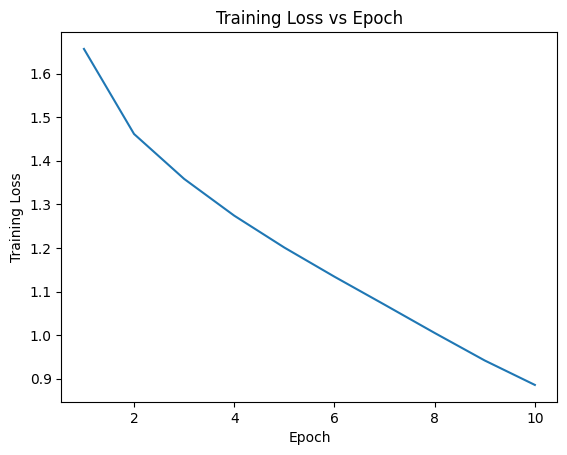

In [11]:

plt.figure()
plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epoch")
plt.show()


In [16]:
num_epochs=15
train_acc_history = []
test_acc_history = []

for epoch in range(num_epochs):

    # ----- TRAIN -----
    correct = 0
    total = 0

    for images, labels in trainloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    train_acc_history.append(train_acc)


    # ----- TEST -----
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100 * correct / total
    test_acc_history.append(test_acc)

    print(f"Epoch {epoch+1}: Train={train_acc:.2f}  Test={test_acc:.2f}")

Epoch 1: Train=71.51  Test=52.19
Epoch 2: Train=71.51  Test=52.19
Epoch 3: Train=71.51  Test=52.19
Epoch 4: Train=71.51  Test=52.19
Epoch 5: Train=71.51  Test=52.19
Epoch 6: Train=71.51  Test=52.19
Epoch 7: Train=71.51  Test=52.19
Epoch 8: Train=71.51  Test=52.19
Epoch 9: Train=71.51  Test=52.19
Epoch 10: Train=71.51  Test=52.19
Epoch 11: Train=71.51  Test=52.19
Epoch 12: Train=71.51  Test=52.19
Epoch 13: Train=71.51  Test=52.19
Epoch 14: Train=71.51  Test=52.19
Epoch 15: Train=71.51  Test=52.19


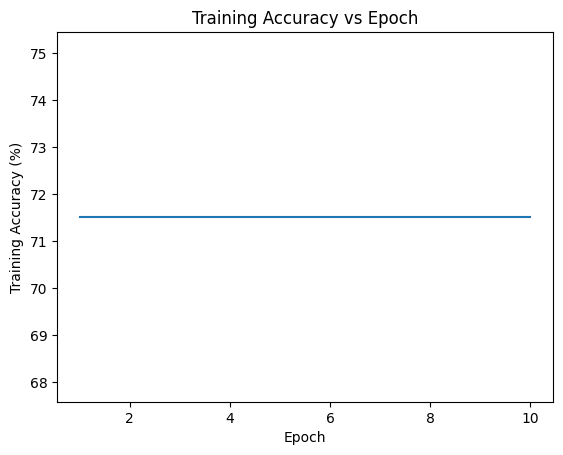

In [13]:

plt.figure()
plt.plot(range(1, len(train_acc_history) + 1), train_acc_history)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy (%)")
plt.title("Training Accuracy vs Epoch")
plt.show()


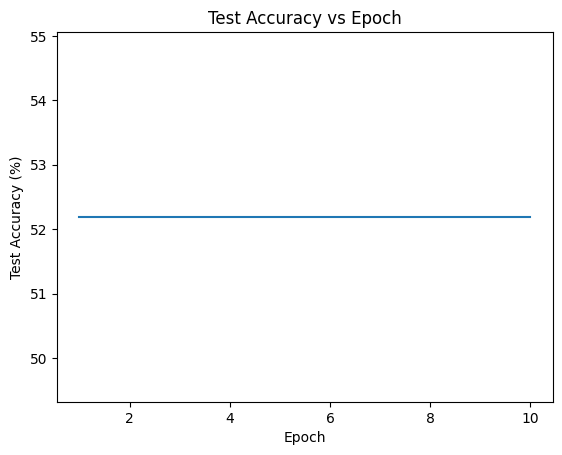

In [14]:
plt.figure()
plt.plot(range(1, len(test_acc_history) + 1), test_acc_history)
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs Epoch")
plt.show()


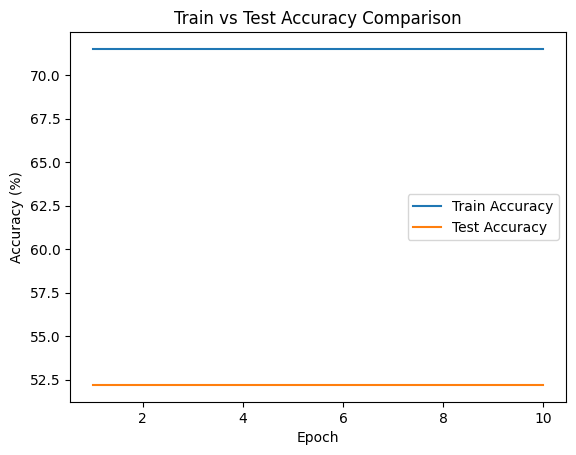

In [15]:
plt.figure()
plt.plot(range(1, len(train_acc_history) + 1), train_acc_history)
plt.plot(range(1, len(test_acc_history) + 1), test_acc_history)

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Train vs Test Accuracy Comparison")
plt.legend(["Train Accuracy", "Test Accuracy"])

plt.show()


### MLP for CIFAR-10

Your model:

```python
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
```
This is a fully connected neural network.

Every neuron in one layer connects to every neuron in the next layer.

Input size:

$$
3 \times 32 \times 32 = 3072
$$

So each image is converted into a 3072-dimensional vector.

### What Happens To The Image

Images from DataLoader have shape:

$$
[batch\_size, 3, 32, 32]
$$

Before passing into Linear layer, we flatten:

```python
x = x.view(x.size(0), -1)
```

If:

$$
x \in \mathbb{R}^{32 \times 3 \times 32 \times 32}
$$

After flattening:

$$
x \in \mathbb{R}^{32 \times 3072}
$$

Here:

- `x.size(0)` keeps batch size
- `-1` automatically computes remaining dimension

Flattening converts image tensor into a vector so MLP can process it.

Mathematically:

$$
i = c \cdot 32 \cdot 32 + h \cdot 32 + w
$$

So 3D image becomes 1D vector.

### What nn.Linear Does

For:

```python
self.fc1 = nn.Linear(3072, 512)
```

Mathematically:

$$
y = Wx + b
$$

Where:

$$
x \in \mathbb{R}^{3072}
$$

$$
W \in \mathbb{R}^{512 \times 3072}
$$

$$
b \in \mathbb{R}^{512}
$$

$$
y \in \mathbb{R}^{512}
$$

Each neuron computes:

$$
y_j = \sum_{i=1}^{3072} W_{ji} x_i + b_j
$$

This is a weighted sum.

### Why Activation Is Needed

Stacking linear layers without activation:

$$
y = W_2(W_1x + b_1) + b_2
$$

Which simplifies to another linear transformation.

So multiple linear layers without activation behave like ONE linear layer.

That cannot learn complex patterns.

### ReLU Activation

You use:

```python
F.relu(self.fc1(x))
```

ReLU formula:

$$
ReLU(x) = \max(0, x)
$$

If:

- $x < 0$ → output 0
- $x > 0$ → output x

Why ReLU:

- Introduces non-linearity
- Helps learn complex decision boundaries
- Reduces vanishing gradient problem

Derivative of ReLU:

$$
ReLU'(x) =
\begin{cases}
1 & x > 0 \\
0 & x \le 0
\end{cases}
$$

### Full Forward Pass

Layer 1:

$$
z_1 = W_1x + b_1
$$

$$
a_1 = ReLU(z_1)
$$

Layer 2:

$$
z_2 = W_2a_1 + b_2
$$

$$
a_2 = ReLU(z_2)
$$

Output Layer:

$$
z_3 = W_3a_2 + b_3
$$

Final output:

$$
\hat{y} = z_3
$$

Shape:

$$
\hat{y} \in \mathbb{R}^{10}
$$

Each value corresponds to one CIFAR-10 class.

### CrossEntropyLoss

You use:

```python
criterion = nn.CrossEntropyLoss()
```

It internally does two steps.

First Softmax:

$$
P(y=i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

Then Log Loss:

$$
Loss = -\log(P(correct\ class))
$$

This penalizes low probability for the correct class.

### Training Process

For each batch:

1. Forward pass → compute predictions
2. Compute loss
3. Backpropagation
4. Update weights

### Backpropagation

We compute gradient:

$$
\frac{\partial Loss}{\partial W}
$$

Using chain rule.

Then optimizer updates:

$$
W := W - \eta \frac{\partial Loss}{\partial W}
$$

Where:

$$
\eta
$$

is learning rate.

This moves weights in direction that reduces loss.

### Why MLP Works

Even though it ignores spatial structure:

It learns decision boundaries in 3072-dimensional space.

However:

- It does not exploit spatial patterns
- It has many parameters
- CNN performs better for images

### Final Summary

Your MLP pipeline:

- Flatten image
- Linear transformation
- ReLU activation
- Linear transformation
- ReLU activation
- Linear transformation
- Softmax (inside loss)
- Cross-entropy
- Gradient descent update
